In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Get some data

In [2]:
import pandas_datareader 
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,7,24)

In [5]:
tesla = web.DataReader('TSLA','yahoo',start,end)
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-20,1650.000000,1488.000000,1519.010010,1643.000000,17121400,1643.000000
2020-07-21,1675.000000,1558.000000,1639.930054,1568.359985,16157300,1568.359985
2020-07-22,1626.420044,1562.000000,1599.000000,1592.329956,14161100,1592.329956
2020-07-23,1689.000000,1480.770020,1678.949951,1513.069946,24328500,1513.069946
2020-07-24,1465.000000,1366.540039,1416.010010,1417.000000,19344700,1417.000000


In [6]:
ford = web.DataReader('F','yahoo',start,end)
gm = web.DataReader('GM','yahoo',start, end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.433165
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.913801
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.582328
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.574041
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.466311


### Visualizing data

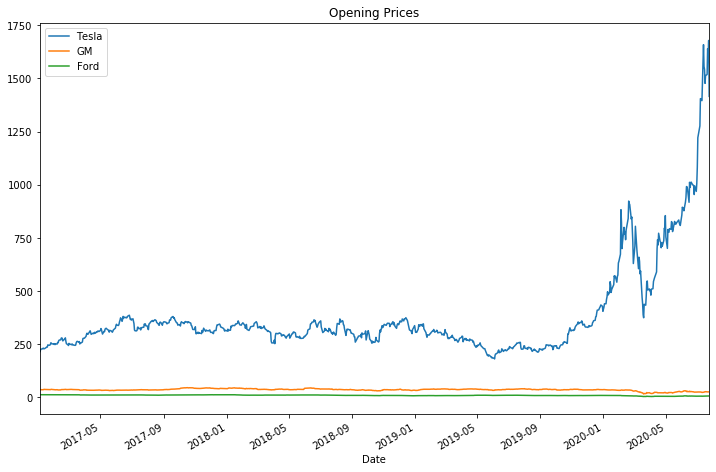

In [7]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

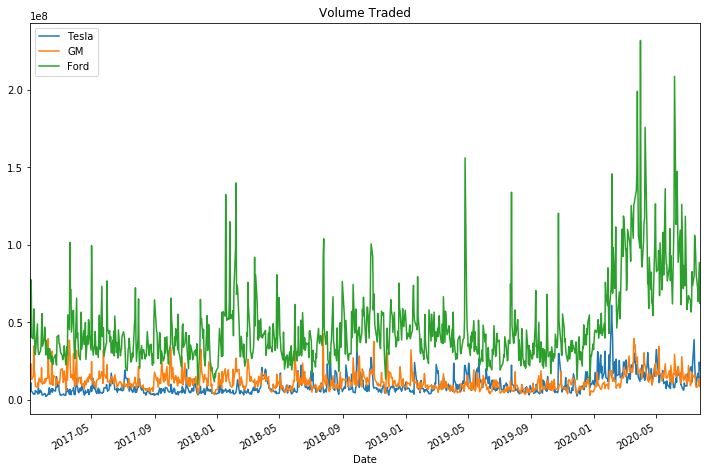

In [8]:
# plot the volume of stock traded
tesla['Volume'].plot(label='Tesla',figsize=(12,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [9]:
# what was the date of the maximum trading volume for Ford
ford['Volume'].idxmax()

Timestamp('2020-03-31 00:00:00')

In [10]:
# create a new column called "Total Traded" which is the Open Price multiplied by the Volume Traded
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

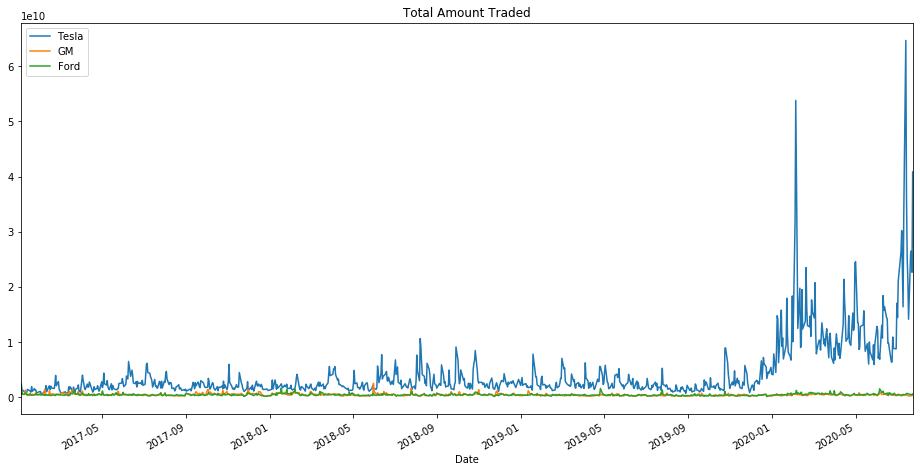

In [11]:
# plot "Total Traded" (amount) against the time index
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8),title="Total Amount Traded")
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [12]:
tesla['Total Traded'].idxmax()

Timestamp('2020-07-13 00:00:00')

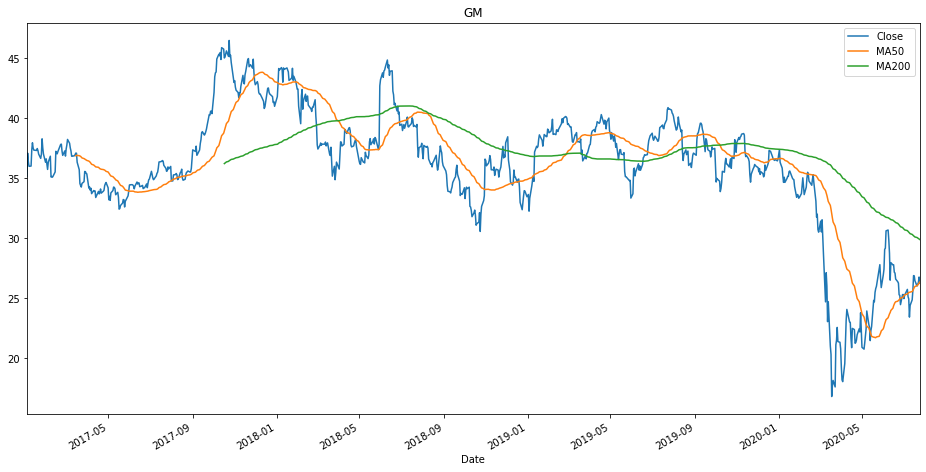

In [13]:
# plot MA (Moving Average)
gm['MA50'] = gm['Close'].rolling(50).mean()
gm['MA200'] = gm['Close'].rolling(200).mean()
gm[['Close','MA50','MA200']].plot(figsize=(16,8),title="GM")

In [14]:
from pandas.plotting import scatter_matrix

In [15]:
car_comp = pd.concat([tesla['Close'],gm['Close'],ford['Close']],axis=1)
car_comp.columns = ['Tesla Close','GM Close','Ford Close']
car_comp.head()

,Tesla Close,GM Close,Ford Close
Date,,,
2017-01-03,216.990005,35.150002,12.59
2017-01-04,226.990005,37.090000,13.17
2017-01-05,226.750000,36.389999,12.77
2017-01-06,229.009995,35.990002,12.76
2017-01-09,231.279999,36.009998,12.63


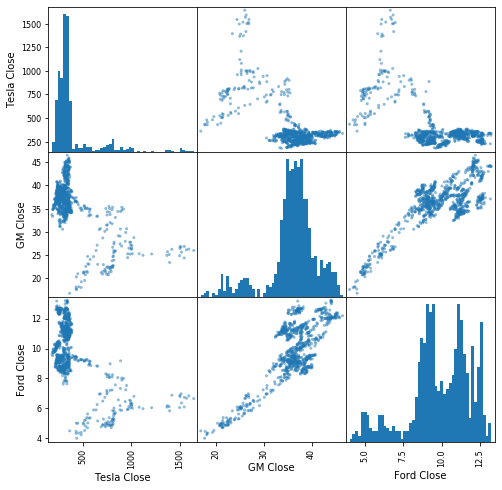

In [16]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50});

In [17]:
# create a CandleStick Chart for Ford in March 2020
# pip install mplfinance
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [18]:
ford_reset = ford.loc['2020-03'].reset_index()
ford_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded
0,2020-03-02,7.23,6.88,7.11,7.20,96766000.0,7.20,6.880063e+08
1,2020-03-03,7.34,6.89,7.29,6.97,97457800.0,6.97,7.104674e+08
2,2020-03-04,7.09,6.92,7.09,7.08,70588100.0,7.08,5.004696e+08
3,2020-03-05,6.97,6.71,6.96,6.74,78070900.0,6.74,5.433735e+08
4,2020-03-06,6.68,6.40,6.60,6.49,109932200.0,6.49,7.255525e+08
5,2020-03-09,6.14,5.87,5.97,5.90,103901700.0,5.90,6.202931e+08
6,2020-03-10,6.29,5.80,6.26,6.26,101873600.0,6.26,6.377288e+08
7,2020-03-11,6.11,5.88,6.06,5.90,98587100.0,5.90,5.974378e+08
8,2020-03-12,5.69,5.20,5.38,5.35,89453100.0,5.35,4.812577e+08
9,2020-03-13,5.90,5.12,5.87,5.63,125375300.0,5.63,7.359530e+08


In [19]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2020-03-02,7.23,6.88,7.11,7.20,96766000.0,7.20,6.880063e+08,737486.0
1,2020-03-03,7.34,6.89,7.29,6.97,97457800.0,6.97,7.104674e+08,737487.0
2,2020-03-04,7.09,6.92,7.09,7.08,70588100.0,7.08,5.004696e+08,737488.0
3,2020-03-05,6.97,6.71,6.96,6.74,78070900.0,6.74,5.433735e+08,737489.0
4,2020-03-06,6.68,6.40,6.60,6.49,109932200.0,6.49,7.255525e+08,737490.0


In [20]:
list_of_cols = ['date_ax','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [21]:
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator()           # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g. Mar 12
dayFormatter = DateFormatter('%d')

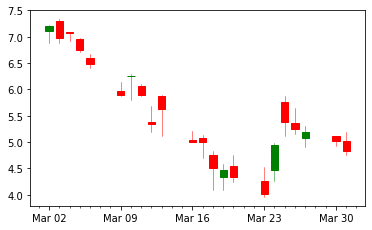

In [22]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,ford_values,width=0.7,colorup='g',colordown='r');

### Daily Percentage Change/Returns

In [23]:
tesla['returns'] =  (tesla['Close'] / tesla['Close'].shift(1) ) - 1
# tesla['returns'] = tesla['Close'].pct_change(1)
tesla['returns']

Date
2017-01-03         NaN
2017-01-04    0.046085
2017-01-05   -0.001057
2017-01-06    0.009967
2017-01-09    0.009912
                ...   
2020-07-20    0.094720
2020-07-21   -0.045429
2020-07-22    0.015283
2020-07-23   -0.049776
2020-07-24   -0.063493
Name: returns, Length: 896, dtype: float64

In [24]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

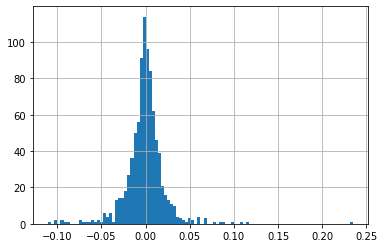

In [25]:
ford['returns'].hist(bins=100)

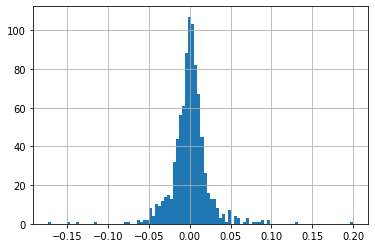

In [26]:
gm['returns'].hist(bins=100)

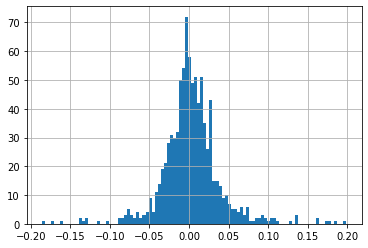

In [27]:
tesla['returns'].hist(bins=100)

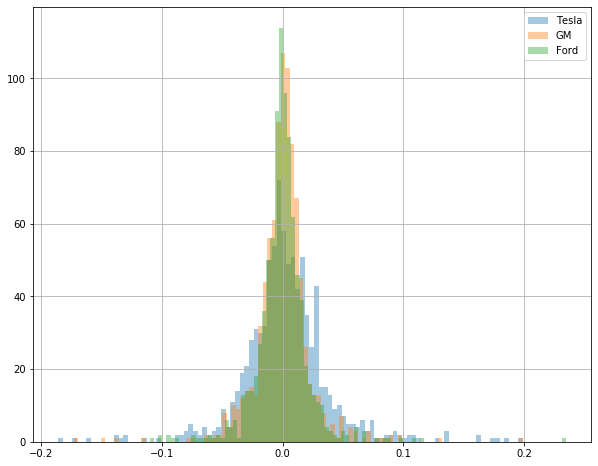

In [28]:
tesla['returns'].hist(bins=100, label='Tesla',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=100, label='GM',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100, label='Ford',figsize=(10,8),alpha=0.4)
plt.legend()

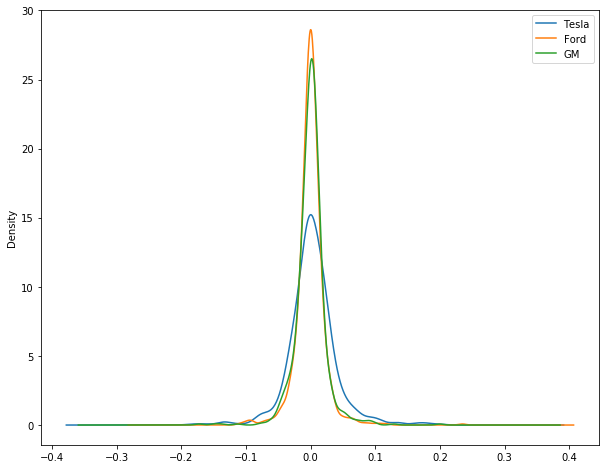

In [29]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
plt.legend()

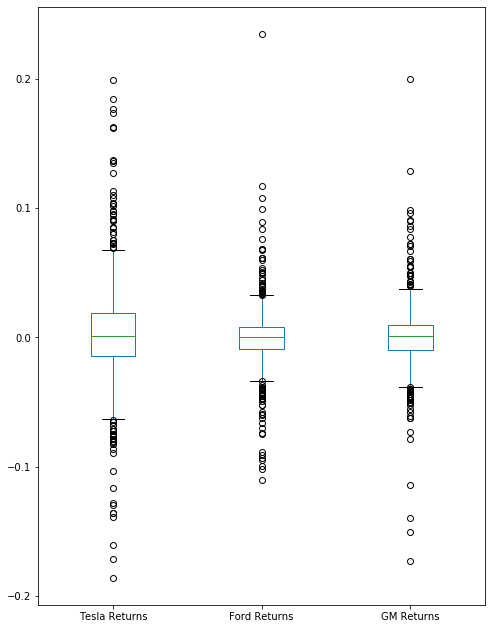

In [30]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Returns','Ford Returns','GM Returns']
box_df.plot(kind='box',figsize=(8,11))

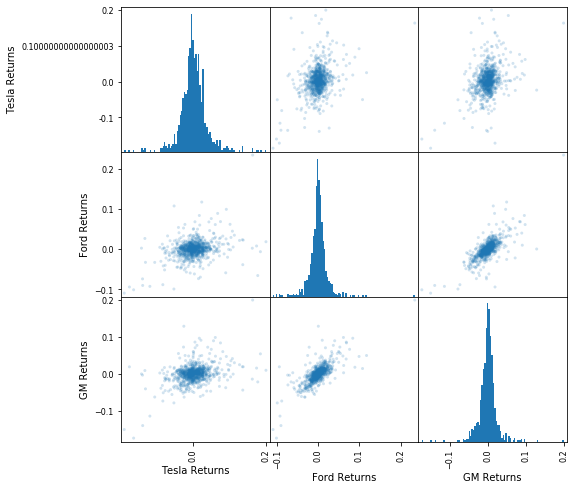

In [31]:
# create a scatter matrix to see the correlation between each of the stocks daily returns
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

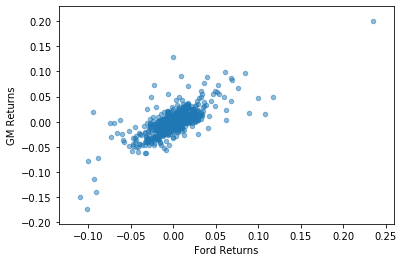

In [32]:
box_df.plot(kind='scatter',x='Ford Returns',y='GM Returns',alpha=0.5)

### Cumulative Daily Returns
A cumulative return is the aggregate amount an investment has gained or lost over time, independent of the period of time involved

Cumulative reutrn is computed relative to the day investment is made

In [33]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005,1.272680e+09,NaN,NaN
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005,2.408099e+09,0.046085,1.046085
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000,1.338527e+09,-0.001057,1.044979
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995,1.254446e+09,0.009967,1.055394
2017-01-09,231.919998,228.000000,228.970001,231.279999,3979500,231.279999,9.111861e+08,0.009912,1.065856
...,...,...,...,...,...,...,...,...,...
2020-07-20,1650.000000,1488.000000,1519.010010,1643.000000,17121400,1643.000000,2.600758e+10,0.094720,7.571777
2020-07-21,1675.000000,1558.000000,1639.930054,1568.359985,16157300,1568.359985,2.649684e+10,-0.045429,7.227798
2020-07-22,1626.420044,1562.000000,1599.000000,1592.329956,14161100,1592.329956,2.264360e+10,0.015283,7.338264


In [34]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

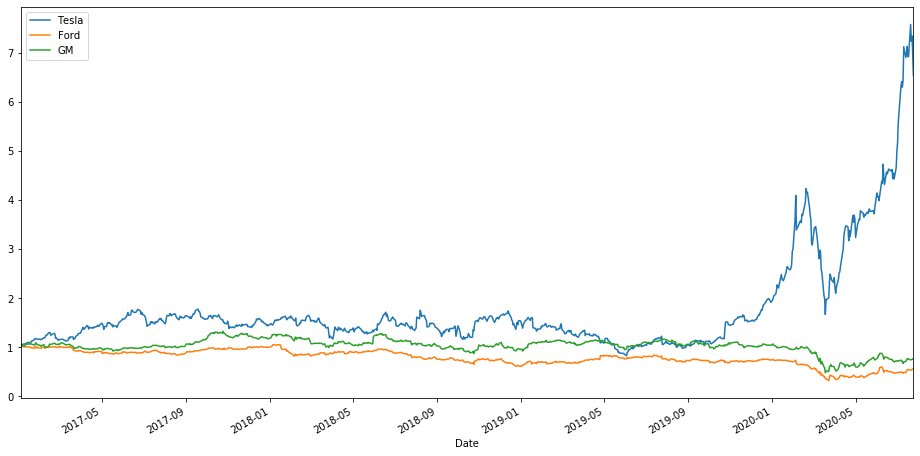

In [35]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()